In [1]:
# Importing required libraries 
import numpy as np
import math
import jax
import sympy
from sympy.vector import gradient, CoordSys3D
import pprint
import pandas as pd
import matplotlib.pyplot as plt

Question 1 :
How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.


Answer : \
The ouput matrix as result of multiplication has dimension n*m . Now, to compute each element of this output matrix we need to compote Dot product between corresponding vectors of length k . This requires k multiplications and k - 1 additions for each element of output matrix . Thus, \
\
Total Number of multiplications needed, $$ = nkm$$ \
Total Number of Additions needed, $$ = n(k-1)m$$


Question 2 :
Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

Answer :\
\
First, we define functions to perform multiplication using list of lists and numpy. We create matrices having random elements and dimensions (n,k) and (k,m), where n,k and m are taken randomly from 3 to 10. 

In [2]:
# Creating the matrices
n = np.random.randint(3,10)
k = np.random.randint(3,10)
m = np.random.randint(3,10)


mat1 = np.random.randn(n,k)
mat2 = np.random.randn(k,m)

# Using list of lists 
def matrix_mult_listoflists(mat1, mat2):
    n = len(mat1)
    m = len(mat2[0])
    k = len(mat2)
    output_mat = np.zeros((n, m))
    
    for i in range(n):
        for j in range(m):
            elem = 0
            for l in range(k):
                elem += mat1[i][l] * mat2[l][j]
            output_mat[i][j] = elem
    
    return output_mat

# Using Numpy
def matrix_mult_numpy(mat1,mat2):
    output_mat = np.matmul(mat1,mat2)
    return output_mat

Now, we compare both in the following cells :

In [3]:
%%timeit
# List of Lists
matrix_mult_listoflists(mat1, mat2)

75.6 µs ± 1 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [4]:
%%timeit
# Numpy
matrix_mult_numpy(mat1, mat2)

706 ns ± 0.573 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


We can clearly see, the numpy multiplication is relatively faster. This is because matrix multiplication is highly optimized in Numpy. Numpy multiplication has been written in C which make it faster then the python lists of lists approach, it uses the BLAS which leveraege the hardware features of the computer for faster computation. Numpy breaks the problem into subproblems and computes them parallaly, thus working on the matrices all together. These resons make numpy multiplication quite fast.

Question 3 :
Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

Answer :\
\
Median is middleth element in the sorted version of the given array. The approach given (call it naive) in the question requires rougly n/2 passes because we want the n/2 th largest element. Now, first pass requires to visit n elements, then next n - 1 and so on, this is theta(n) elements. So, this naive approach has complexity of O(n^2).\
Yes, we can suggest a better method for this (call it better). First, we sort the array which has the complexity of O(nlogn) and then we know the midleth element or the average of middleth elements is the median.
We implement all these methods and then compare below.

In [5]:
nparray = np.random.randint(0,100, size = 101)
array = list(nparray)


# Naive approach
def median_naive(arr):
    arr2 = arr.copy()
    if (len(arr)%2 == 0):
        m = len(arr)//2 
    else :
        m = len(arr)//2 + 1
    for i in range(m):
        median1 = arr2[0]
        ind = 0
        for j in range(len(arr2)):
            if arr2[j] > median1:
                median1 = arr2[j]
                ind = j
        arr2.pop(ind)

    median2 = arr2[0]
    for j in range(len(arr2)):
            if arr2[j] > arr[median2]:
                median2 = arr2[j]

    if (len(arr)%2 == 0):
        return (median1+median2)/2
    else :
        return median1

# Better Approach
def median_better(arr):
    arr_sorted = sorted(arr)
    n = len(arr)
    if (len(arr)%2 == 0):
        return (arr_sorted[n//2] + arr_sorted[n//2 - 1])/2
    else :
        return (arr_sorted[n//2])

# Numpy approach
def median_numpy(arr):
    return np.median(arr)

Comparing,

In [6]:
%%timeit
m1 = median_naive(array)

83.8 µs ± 788 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [7]:
%%timeit
m2 = median_better(array)

5.52 µs ± 53.6 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [8]:
%%timeit
m3 = median_numpy(nparray)

5.35 µs ± 39 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [9]:
m1 = median_naive(array)
m2 = median_better(array)
m3 = median_numpy(nparray)
print(f"Median Using naive approach : {m1} \nMedian using Better approach : {m2} \nMedian using numpy : {m3}") 

Median Using naive approach : 41 
Median using Better approach : 41 
Median using numpy : 41.0


We test all the three approaches over array with 100 elements. We can clearly see all the three approaches gave the same result. And np.median() comes out to be fastest of all.

Question 4 :
What is the gradient of the following function with respect to x and y?
$$x^{2}y + y^{3}sin(x)$$

Answer :
Given, 
$$f(x,y) = x^{2}y + y^{3}sin(x)$$

We know gradient of a function is defined as,
$$\nabla f = \frac{\partial f}{\partial x}\hat{i} + \frac{\partial f}{\partial y}\hat{j} $$
Now, we have,
$$\frac{\partial f}{\partial x} = 2xy + y^{3}cos(x)$$
$$\frac{\partial f}{\partial y} = x^{2} + 3y^{2}sin(x)$$
Therefore,
$$ \nabla f= (2xy + y^{3}cos(x)) \hat{i} + (x^{2} + 3y^{2}sin(x)) \hat{j}$$


Question 5 :
Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y.

Answer :\
\
We compute JAX gradient using jax.grad() and then compare it against the actual gradient.

In [10]:
def function(x, y):
    return (x**2) * y + (y**3) * jax.numpy.sin(x)

def jax_grad(x_,y_):
    return jax.grad(function, (0, 1))(float(x_),float(y_))

def actual_grad(x,y):
    return (2*(x)*y + (y**3)*math.cos(x),(x**2) + 3*(y**2)*math.sin(x))


In [11]:
# Comparing

for i in range(5):
    x_ = np.random.randint(-10,10)
    y_ = np.random.randint(-10,10)
    j = jax_grad(x_,y_)
    a = actual_grad(x_,y_)
    print(f"Test Case {i} x = {x_} y= {y_} \nActual gradient = ({a[0]},{a[1]}) \nJAX gradient = ({j[0]},{j[1]})\n")

Test Case 0 x = -3 y= -5 
Actual gradient = (153.7490620750557,-1.5840006044900417) 
JAX gradient = (153.74905395507812,-1.584000587463379)

Test Case 1 x = -6 y= -8 
Actual gradient = (-395.6071867649874,89.64777565419377) 
JAX gradient = (-395.607177734375,89.64777374267578)

Test Case 2 x = -3 y= -5 
Actual gradient = (153.7490620750557,-1.5840006044900417) 
JAX gradient = (153.74905395507812,-1.584000587463379)

Test Case 3 x = -9 y= 6 
Actual gradient = (-304.8041365670902,36.49120359389029) 
JAX gradient = (-304.80413818359375,36.49120330810547)

Test Case 4 x = 6 y= -2 
Actual gradient = (-31.681362293202927,32.64701402161289) 
JAX gradient = (-31.68136215209961,32.64701461791992)



We can see jax.grad() computes the gradient quite accurately for randomly picked values.

Question 6 :
Use sympy to confirm that you obtain the same gradient analytically.

Answer : \
\
We use the CoordSys3D and gradient module of sympy to compute the gradient. It comes out that it matches the gradient we computed manually.

In [12]:
R = CoordSys3D('R')
f = (R.x**2)*(R.y) + (R.y**3)*(sympy.sin(R.x))
gradient(f)

(2*R.x*R.y + R.y**3*cos(R.x))*R.i + (R.x**2 + 3*R.y**2*sin(R.x))*R.j

Question 7:
Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks. Something like:

1. 2022
    1. Branch 1
        1. Roll Number: 1, Name: N, Marks:
            1. Maths: 100, English: 70 …
    2. Branch 2
2. 2023
    1. Branch 1
    2. Branch 2
3. 2024
    1. Branch 1
    2. Branch 2
4. 2025
    1. Branch 1
    2. Branch 2

Answer :

We know, Python dictionery is collection of objects where each has a key and a value. We use it to store the given data as following.

In [13]:
required_dictionery = {"2022":[{"Branch1":{"Roll Number: 1, Name: N, Marks:":{ "Maths": 100, "English": 70}}},"Branch2"],"2023":["Branch1", "Branch2"],"2024": ["Branch1", "Branch2"],"2025":["Branch1", "Branch2"]}
pprint.PrettyPrinter().pprint(required_dictionery)

{'2022': [{'Branch1': {'Roll Number: 1, Name: N, Marks:': {'English': 70,
                                                           'Maths': 100}}},
          'Branch2'],
 '2023': ['Branch1', 'Branch2'],
 '2024': ['Branch1', 'Branch2'],
 '2025': ['Branch1', 'Branch2']}


Question 8 :
Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

Answer : \
\
Class can be used to create objects and define their properties. We use classes to represent the information as follows :

In [14]:
class Marks:
    def __init__(self, Maths, English):
        self.Maths = Maths
        self.English = English
    def __repr__(self):
        return f"\n\t\t\tMaths : {self.Maths}, English : {self.English}"

class Student:
    def __init__(self, roll_number, name, marks):
        self.roll_number = roll_number
        self.name = name
        self.marks = marks

    def __repr__(self):
        return f"\n\t\tRoll Number: {self.roll_number}, Name: {self.name}, Marks: {self.marks}"

class Branch:
    def __init__(self, name):
        self.name = name
        self.students = []

    def add_student(self, student):
        self.students.append(student)

    def __repr__(self):
        return f"\n\tBranch {self.name}{self.students}\n"

class Year:
    def __init__(self, year):
        self.year = year
        self.branches = []

    def add_branch(self, branch):
        self.branches.append(branch)

    def __repr__(self):
        return f"{self.year}{self.branches}"
    
class Data:
    def __init__(self):
        self.years = []
    
    def add_year(self, year):
        self.years.append(year)

    def print_data(self):
        for year in self.years:
            print(year)
            print("\n")
    
marks = Marks(100,70)
student1 = Student(1, "N", marks)

branch1 = Branch(1)
branch1.add_student(student1)

branch2 = Branch(2)

year2022 = Year(2022)
year2022.add_branch(branch1)
year2022.add_branch(branch2)

year2023 = Year(2023)
year2023.add_branch(Branch(1))
year2023.add_branch(Branch(2))

year2024 = Year(2024)
year2024.add_branch(Branch(1))
year2024.add_branch(Branch(2))


data = Data()
data.add_year(year2022)
data.add_year(year2023)
data.add_year(year2024)

data.print_data()

2022[
	Branch 1[
		Roll Number: 1, Name: N, Marks: 
			Maths : 100, English : 70]
, 
	Branch 2[]
]


2023[
	Branch 1[]
, 
	Branch 2[]
]


2024[
	Branch 1[]
, 
	Branch 2[]
]




Question 9 :
Using matplotlib plot the following functions on the domain : x = 0.5 to 100.0 in steps of  0.5
$$1. y = x $$
$$2. y = x^{2} $$
$$3. y = \frac{x^{3}}{100} $$
$$4. y = sin(x) $$
$$5. y = \frac{sin(x)}{x} $$ 
$$6. y = log(x) $$
$$7. y = e^{x} $$
 


Answer

In [15]:
# Defining the functions

def function_1(x):
    return x

def function_2(x):
    return x**2

def function_3(x):
    return (x**3)/100

def function_4(x):
    return math.sin(x)

def function_5(x):
    return math.sin(x)/x

def function_6(x):
    return math.log10(x)

def function_7(x):
    return math.exp(x)

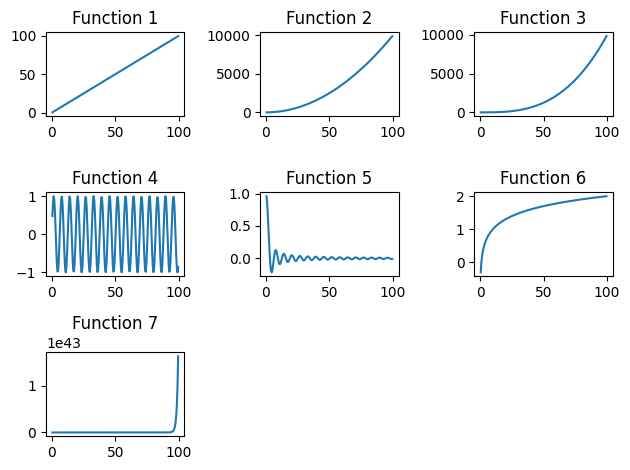

In [16]:
# Plotting
functions = [function_1, function_2, function_3, function_4, function_5, function_6, function_7]

x = np.arange(0.5, 100, 0.5)
y = np.empty(len(x))

j = 0

def mod(j):
    if j%3 != 0 :
        return j%3
    else: return 3

plt.figure()
for row in range(3):
    for col in range(3):
        if (row == 2 and (col == 1 or col == 2)):
            continue
        func_ = functions[3*row + col]
        for i in range(len(x)):
            y[i] = func_(x[i])
        plt.subplot(3, 3, 3*row + col +1)
        plt.plot(x, y)
        plt.title(f"Function {3*row + col+1}")
plt.tight_layout()
plt.show()
        
    

Question 10 :
Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

Answer : 

In [17]:
# Building the DataFrame
mat = np.random.uniform(1,2,size = (20,5))
data_fram = pd.DataFrame(mat, columns = ['a','b','c','d','e'])
data_fram.head(5)

,a,b,c,d,e
0,1.270920,1.185352,1.728127,1.874760,1.278314
1,1.264836,1.571926,1.833903,1.160507,1.198396
2,1.540090,1.279758,1.869919,1.390403,1.770862
3,1.143071,1.007102,1.059974,1.383831,1.238100
4,1.495206,1.704057,1.261922,1.315142,1.832191


Now, we find the requried column with highest sd and row with lowest mean using bruteforce as well as numpy.

In [18]:
col_number = 0
highest_sd = np.std(mat[:, 0])

for i in range(1, 5):
    current_sd = np.std(mat[:, i])
    if current_sd > highest_sd:
        highest_sd = current_sd
        col_number = i

col_number_numpy = np.argmax(np.std(mat, axis=0))


row_number = 0
lowest_mean = np.mean(mat[0, :])

for i in range(1, 20):
    current_mean = np.mean(mat[i, :])
    if current_mean < lowest_mean:
        lowest_mean = current_mean
        row_number = i


row_number_numpy = np.argmin(np.mean(mat, axis=1))

print("Column number: ", col_number, "\n", "Row number: ", row_number)
print("\nUsing numpy:")
print("Column number: ", col_number_numpy, "\n", "Row number: ", row_number_numpy)


Column number:  1 
 Row number:  11

Using numpy:
Column number:  1 
 Row number:  11


Question 11 :
Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

Answer :

We first insert the required columns.

In [19]:
data_fram['f'] = np.sum(mat, axis = 1)
data_fram['g'] = np.empty(20)

for i in range(20) :
    if (data_fram['f'][i] < 8):
        data_fram['g'][i] = 'LT8'
    else :
        data_fram['g'][i] = 'GT8'
data_fram.head(5)

,a,b,c,d,e,f,g
0,1.270920,1.185352,1.728127,1.874760,1.278314,7.337473,LT8
1,1.264836,1.571926,1.833903,1.160507,1.198396,7.029568,LT8
2,1.540090,1.279758,1.869919,1.390403,1.770862,7.851031,LT8
3,1.143071,1.007102,1.059974,1.383831,1.238100,5.832077,LT8
4,1.495206,1.704057,1.261922,1.315142,1.832191,7.608519,LT8


Now, finding the standard deviations.

In [20]:
print(f"Standard Deviation of f for GTB rows : {np.std(data_fram.where(data_fram['f'] > 8)['f'])}\n")
print(f"Standard Deviation of f for LTB rows : {np.std(data_fram.where(data_fram['f'] <= 8)['f'])}\n")

Standard Deviation of f for GTB rows : 0.024779531084705653

Standard Deviation of f for LTB rows : 0.6425248593718538



Question 12 :
Write a small piece of code to explain broadcasting in numpy.

Answer : 

Broadcasting in Numpy :
When we try to perform operations on two matrices with incompaible sizes, numpy tries to resolve the incompatibilty by broadcasting the matrices. In broacasting, certain part of matrices get repeated or transposed to match the compatible dimensions.\
As in below example, when we add 2 to the 3,3 matrix it gets added to all the entries in the matrix (get converted to a 3,3 matrix with all 2s).

In [21]:
mat_1 = np.mat([[1,1,1,],[1,1,1],[2,2,2]])
mat_1 + 2

matrix([[3, 3, 3],
        [3, 3, 3],
        [4, 4, 4]])

Similarly, in this example mat_2 the row matrix gets converted to 3,3 matrix by repitition of the row.

In [22]:
mat_1 = np.mat([[1,2,3,],[1,2,3],[1,2,3]])
mat_2 = np.mat([2,2,2])
mat_1 + mat_2

matrix([[3, 4, 5],
        [3, 4, 5],
        [3, 4, 5]])

This explains the broacasting.

Question 13 :
Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

Answer :\
\
We implement the argmin using the BruteForce approach and then verify with numpy.

In [23]:
def compute_argmin(array):
    min_index = 0
    min_element = array[0]
    for i in range(1,len(array)):
        if (array[i] < min_element):
            min_index = i
            min_element = array[i]
    return min_index

arr = np.random.randn(50)
argmin = compute_argmin(arr)
argmin_numpy = np.argmin(arr)
print(f"argmin of the array : {argmin} \nargmin of the array using numpy : {argmin_numpy}")


argmin of the array : 3 
argmin of the array using numpy : 3


We can see both give the same result.